<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Lineal</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scs

<p style="text-align:justify"><div class="alert alert-danger">

## Regresión Lineal
La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores o predictores.

<p style="text-align:justify"><div class="alert alert-danger">

## Definición 
El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones  $\{y_i, x_{i1},...,x_{np}\}^{n}_{i=1}$ , la media  $μ$  de la variable respuesta  $y$  se relaciona de forma lineal con la o las variables regresoras  $x_1  ...  x_p$  acorde a la ecuación:

$$\{y_i, x_{i1},...,x_{np}\}^{n}_{i=1}$$
 
El resultado de esta ecuación se conoce como la línea de regresión poblacional, y recoge la relación entre los predictores y **la media** de la variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de estadística es:

$$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$$
 
En este caso, se está haciendo referencia al valor de $y$  para una observación $i$  concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error  $ϵ$.

En ambos casos, la interpretación de los elementos del modelo es la misma:

$β_0$ : es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta  y  cuando todos los predictores son cero.

$β_j$ : es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora  $x_j$ , manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

$e$ : es el residuo o error, la diferencia entre el valor observado $y$ el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en $y$  pero que no se incluyen en el modelo como predictores.

En la gran mayoría de casos, los valores $β_0$ y $β_j$ poblacionales se desconocen, por lo que, a partir de una muestra, se obtienen sus estimaciones  $\hat{β}_0$ y $\hat{β}_j$. Ajustar el modelo consiste en estimar, a partir de los datos disponibles, los valores de los coeficientes de regresión que maximizan la verosimilitud, es decir, los que dan lugar al modelo que con mayor probabilidad puede haber generado los datos observados.

El método empleado con más frecuencia es el ajuste por mínimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresión múltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.

Computacionalmente, estos cálculos son más eficientes si se realizan de forma matricial:
$$\mathbf{y}=\mathbf{X}^T \mathbf{\beta}+\epsilon$$

$$\mathbf{y}=\begin{bmatrix} y_1\\  y_2\\  ...\\ y_n\end{bmatrix} \ , \ \ \ \mathbf{X}=\begin{bmatrix} 1 & x_{11} & ... & x_{1p}\\  1 & x_{21} & ... & x_{2p}\\  1 & ... &  ... & ... \\  1 &  x_{n1} & ... &x_{np}\\   \end{bmatrix} \ , \ \ \ \mathbf{\beta}=\begin{bmatrix} \beta_0\\ \beta_1\\  ...\\ \beta_n\end{bmatrix} \ , \ \ \ \mathbf{\epsilon}=\begin{bmatrix} \epsilon_1\\ \epsilon_2\\  ...\\ \epsilon_n\end{bmatrix}$$
    
el problema a resolver es la minimización de la suma de los cuadrados de los términos de error tal que:
$$Min \sum (e_i)^2= \sum (Y_i - \hat Y_i)^2 =\sum (Y_i - \hat\beta X)^2$$
Desarrollando dicho cuadrado y derivando respecto a cada $\hat\beta_i$ obtenemos el siguiente sistema de ecuaciones normales expresado en notación matricial:
$$X'X\hat \beta = X'y$$
en donde basta con despejar $\hat\beta$ premultiplicando ambos miembros por la inversa de la matriz para obtener la estimación de los parámetros del modelo tal que:
$$\hat \beta =X'X ^{-1} X'y$$
Una vez estimados los coeficientes, se pueden obtener las estimaciones de cada observación ($\hat{y}_i$):
$$\hat{y}_i= \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + ... + \hat{\beta}_p x_{ip}$$

Finalmente, la estimación de la varianza del modelo ($\hat{σ}^2$) se obtiene como:
$$\hat{\sigma}^2 = \frac{\sum^n_{i=1} \hat{\epsilon}_i^2}{n-p} = \frac{\sum^n_{i=1} (y_i - \hat{y}_i)^2}{n-p}$$

donde $n$  es el número de observaciones y $p$  el número de predictores.

<p style="text-align:justify"><div class="alert alert-danger">

     
### Significado "lineal"

El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón lineal.

La siguiente ecuación muestra un modelo lineal en el que el predictor $x_1$ no es lineal respecto a $y$:

$$y = \beta_0 + \beta_1x_1 + \beta_2log(x_1) + \epsilon$$

<font color=blue> **Existen varias librerias en python que nos permiten realizar regresión lineal, la forma más sencilla es utilizar la lbrería Numpy, aunque es la menos descriptiva.** 

In [2]:
datafile="C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/propiedad_1.xls"#este archivo contiene tres hojas de calculo 
data = pd.read_excel(datafile, sheet_name=None, header=0)
data['calibracion'].head()
data1=data['calibracion']
data1

,Predicted,Measured
0,8.876835,8.964832
1,6.577969,6.600000
2,8.027663,8.200000
3,6.401841,6.300000
4,7.413652,7.354888
5,5.129413,5.224541
6,5.175541,5.150000
7,5.635566,5.664071
8,5.804860,5.700000
9,9.924049,9.947710


In [3]:
datacc=data['calibracion']
dataval=data['validacion']
datapre=data['prediccion']
datacc.head()

,Predicted,Measured
0,8.876835,8.964832
1,6.577969,6.600000
2,8.027663,8.200000
3,6.401841,6.300000
4,7.413652,7.354888


In [4]:
# Librería numpy permite obtener la pendiente y el corte de un ajuste lineal entre dos serie datos
x=datacc['Predicted']
y=datacc['Measured']
# Ajuste a una recta (polinomio de grado 1)
p = np.polyfit(x, y, 1)
# No es posible obtener métricas estadísticas con el coeficiente de regresión
print(p)
# y(x)=p0x+p1=1.00000009e+00x-4.29084910e-05, muestra la pendiente y el corte

[9.99986471e-01 1.09565609e-04]


<font color=red> **Otra librería útil es la denominada statmodels que permite hacer analisis estadístico de muchos tipos entre ellos OLS, aquí una muestra.** 

In [5]:
# Statsmodels permite realizar el ajuste y obtener varias métrias que nos dan información de la robustes del modelo
mod = sm.OLS(x, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              Predicted   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.729e+05
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                    1.33e-64
Time:                        16:04:00   Log-Likelihood:                          28.199
No. Observations:                  35   AIC:                                     -54.40
Df Residuals:                      34   BIC:                                     -52.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
lm = sm.OLS.from_formula('Measured ~ Predicted', data1)
res1 = lm.fit()

In [7]:
res1.rsquared, res1.fvalue, res1.params.Intercept, res1.params.Predicted

(0.9979061830994562,
 15727.690436412951,
 0.0001095656094682873,
 0.9999864713588223)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Measured', ylabel='Predicted'>

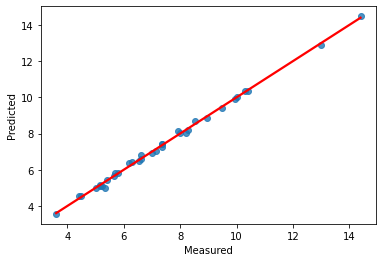

In [8]:
import seaborn as sns
sns.regplot('Measured', 'Predicted', data1, line_kws = {"color":"r"}, ci=None)

### <font color=green> Aunque existen otras librerias, la que prefiero por su facilidad e información, scipy.stats.

In [9]:
corr_test = scs.pearsonr(x, y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9989525429666097
P-value:  8.616108553417022e-46


In [10]:
slope, intercept, r_value, p_value, std_err = scs.linregress(x, y)
print ("slope:", slope)
print ("Intercept:", intercept)
print ("r-squared:", r_value**2)
print ("std_err:", std_err)

slope: 0.9999864713588222
Intercept: 0.00010956560947139593
r-squared: 0.9979061830994562
std_err: 0.00797373224838421


In [11]:
X1=[198380, 333251, 133079, 74801, 56960, 104646, 131663, 343303, 77831]
X2=[208443, 359609, 141744, 78903, 60646, 110516, 138595, 362233, 81324]
X1=np.array(X1)
X2=np.array(X2)

In [12]:
import scipy.stats as scs
corr_test = scs.pearsonr(X2, X1)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9998055167566979
P-value:  3.377089619493181e-13


In [13]:
slope, intercept, r_value, p_value, std_err = scs.linregress(X2, X1)
print ("slope:", slope)
print ("Intercept:", intercept)
print ("r-squared:", r_value**2)
print ("std_err:", std_err)

slope: 0.9349994539373302
Intercept: 1348.0763373039663
r-squared: 0.9996110713371285
std_err: 0.006970786536199842


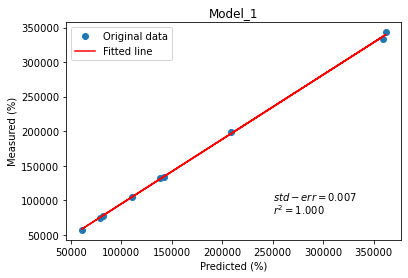

In [14]:
fig, ax= plt.subplots()
ax.plot(X2, X1, 'o', label='Original data')
ax.plot(X2, intercept + slope*X2, 'r', label='Fitted line')
ax.legend()
ax.set_title("Model_1")
ax.set_xlabel("Predicted (%)")
ax.set_ylabel("Measured (%)")
ax.text(250000,100000, r"$std-err = "+str("{0:.3f}".format(std_err))+r"$", fontsize=10, color="black")
ax.text(250000,80000, r"$r^2 = "+str("{0:.3f}".format(r_value**2))+r"$", fontsize=10, color="black")
plt.show()
fig.savefig("ccal.pdf",bbox_inches='tight')

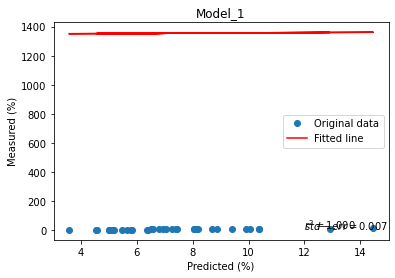

In [15]:
fig, ax= plt.subplots()
ax.plot(x, y, 'o', label='Original data')
ax.plot(x, intercept + slope*x, 'r', label='Fitted line')
ax.legend()
ax.set_title("Model_1")
ax.set_xlabel("Predicted (%)")
ax.set_ylabel("Measured (%)")
ax.text(12,7, r"$std-err = "+str("{0:.3f}".format(std_err))+r"$", fontsize=10, color="black")
ax.text(12,6.0, r"$r^2 = "+str("{0:.3f}".format(r_value**2))+r"$", fontsize=10, color="black")
plt.show()
fig.savefig("ccal.pdf",bbox_inches='tight')

In [16]:
xp=datapre['Measured']

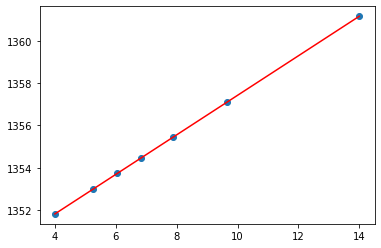

In [17]:
def predict_y_for(x):
    return slope * x + intercept

plt.scatter(xp, predict_y_for(xp))
plt.plot(xp, predict_y_for(xp), c='r')
plt.show()

### <font color=orange> Una de las librerias mas utilizadas, especialmente en análisis multivariado, es scikit learn. Los datos deben ser tipo arreglo, por ello se deben convertir los datos a ese formato.

In [18]:
x.shape

(35,)

In [19]:
x1=x.values.reshape(35, 1) # Los datos se convierten al formato tipo arreglo
y1=y.values.reshape(35, 1)

In [20]:
import sklearn.metrics as skm
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x1, y1)
y1_pred = reg.predict(x1)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y1, y1_pred)
r2=skm.r2_score(y1, y1_pred)

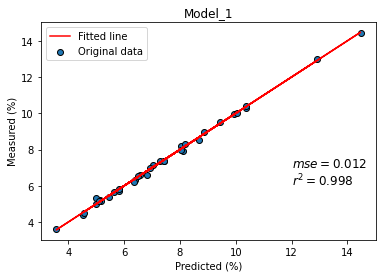

In [22]:
fig, ax= plt.subplots()
ax.scatter(x1, y1, label='Original data', edgecolors='black')
ax.plot(x1, b + m*x, 'r', label='Fitted line')
ax.legend()
ax.set_title("Model_1")
ax.set_xlabel("Predicted (%)")
ax.set_ylabel("Measured (%)")
ax.text(12,7, r"$mse = "+str("{0:.3f}".format(mse))+r"$", fontsize=12, color="black")
ax.text(12,6.0, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()
fig.savefig("ccal.pdf",bbox_inches='tight')

<font color=blue size=6>**Regresión Lineal Multiple o Multivariada**

<font color=gree size=4>La libreria statmodel permite realizar análisis lineal múltiple, especialmente cuando el número de variables independientes o predictores es relativamente pequeño. En este ejemplo utilizaremos las áreas de las bandas más importantes de los espectros FTIR de 83 muestras de crudo y como variable dependiente a predecir se utilizó la estabilidad (ASCI). Las areas de las bandas fueron agrupados en tres variables A1, A2 y A3. Se utilizará la función ${\tt from\_formula()}$. La sintáxis para construir el modelo es ${\tt from\_formula (y∼A1+A2+A3)}$, donde los predictores son $A1$, $A2$, y $A3$. La función ${\tt summary()}$ mostrará los coeficientes de regresión para todos los predictores.

In [56]:
import scipy.io #scipy.io me permite leer datos construidos en matlab
espectros = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/espectros.mat')# este archivo contiene las intensidades de
# 83 espectros FTIR de crudos colombianos y será utilizados como ejemplo en esta sección
# del curso
propiedad = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/propiedad.mat')#Medida de asci de los crudos a los que corresponden los espectros
#ftir

In [74]:
import scipy.io #scipy.io me permite leer datos construidos en matlab
espectros = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/espectros.mat')# este archivo contiene las intensidades de
# 83 espectros FTIR de crudos colombianos y será utilizados como ejemplo en esta sección
# del curso
from scipy import stats # importando scipy.stats

In [75]:
datos_esp=pd.DataFrame(espectros['espectros']) # Para mayor comunidad los datos de
prop=pd.DataFrame(propiedad['propiedades'])
datos_esp # interés son convertidos en dataframe

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
80,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,0.017184,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [60]:
datos_espT=datos_esp.T

Text(0.5, 0, 'número de onda')

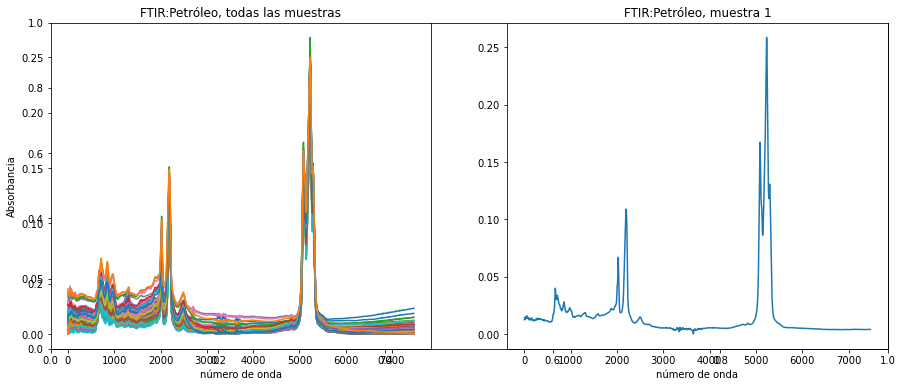

In [61]:
fig, esp= plt.subplots(figsize=(15, 6))
esp1 = fig.add_subplot(1, 2, 1)
esp2 = fig.add_subplot(1, 2, 2)
esp1.plot(datos_espT)
esp1.set_title("FTIR:Petróleo, todas las muestras")
esp1.set_xlabel("número de onda")
esp1.set_ylabel("Absorbancia")
esp2.plot(datos_espT[1])
esp2.set_title("FTIR:Petróleo, muestra 1")
esp2.set_xlabel("número de onda")
#esp2.set_ylabel("Absorbancia")
#plt.subplots_adjust(left=1, wspace=0.1, hspace=0.5, bottom=0.1, top=0.9, right=3)

<font color=black size=4>**Las áreas $A1$, $A2$, y $A3$ son calculadas como la suma de intensidades en las regiones especificadas en la celda siguiente.**

In [68]:
A1=datos_espT[4800:5800].sum(axis=0)
A2=datos_espT[1900:2400].sum(axis=0)
A3=datos_espT[500:1000].sum(axis=0)

In [70]:
A3

0     11.517964
1     10.595512
2     13.891529
3     13.581369
4     11.430203
        ...    
77    12.612466
78    12.514294
79    16.588648
80    15.741112
81    24.358940
Length: 82, dtype: float64

<font color=black size=4>**Se crea una nueva tabla de datos (DataFrame) incluyendo las áreas y la propiedad.**

In [73]:
A=[A1, A2, A3]
A=pd.DataFrame(A).T
AI=pd.concat([prop, A], axis=1)
AI=AI.set_axis(['Prop', 'A1', 'A2', 'A3'], axis=1, inplace=False)
AI

,Prop,A1,A2,A3
0,10,46.741856,17.117360,11.517964
1,10,46.439863,16.249668,10.595512
2,13,47.450550,19.776143,13.891529
3,11,52.494911,19.790982,13.581369
4,11,45.445763,16.641630,11.430203
...,...,...,...,...
78,10,51.226270,19.145041,12.514294
79,9,54.006498,23.482383,16.588648
80,11,46.478486,21.759639,15.741112
81,12,54.461384,29.637774,24.358940


In [76]:
# O podemos llenar los valores perdidos con ceros o cualquier otro valor
AI =AI.fillna(32)
AI

,Prop,A1,A2,A3
0,10,46.741856,17.117360,11.517964
1,10,46.439863,16.249668,10.595512
2,13,47.450550,19.776143,13.891529
3,11,52.494911,19.790982,13.581369
4,11,45.445763,16.641630,11.430203
...,...,...,...,...
78,10,51.226270,19.145041,12.514294
79,9,54.006498,23.482383,16.588648
80,11,46.478486,21.759639,15.741112
81,12,54.461384,29.637774,24.358940


<font color=black size=4>**Se construye el modelo y se revisa.**

In [77]:
model = sm.OLS.from_formula('Prop ~ A1 + A2 + A3', AI)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prop   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.374
Date:                Tue, 31 Aug 2021   Prob (F-statistic):              0.257
Time:                        16:38:13   Log-Likelihood:                -215.47
No. Observations:                  83   AIC:                             438.9
Df Residuals:                      79   BIC:                             448.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4699      4.230      3.184      0.002       5.051      21.889
A1             0.1145      0.151      0.757      0.451      -0.187       0.416
A2            -0.4151      0.567     -0.732      0.466      -1.543       0.713
A3             0.2025      0.506      0.400      0.690      -0.805       1.210
==============================================================================
Omnibus:                        2.095   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.445
Skew:                          -0.049   Prob(JB):                        0.486
Kurtosis:                       2.361   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=black size=4>**También se puede construir el modelo incluyendo la variables independientes o predictores, $A1$, $A2$, y $A3$ directamente de la tabla de datos, este caso es adecuado cuando el número de variables es relativamente grande.**

In [78]:
# Todas la columnas (excepto Prop, que es la variable respuesta)
model1 = sm.OLS.from_formula('Prop ~ ' + '+'.join(AI.columns.difference(['Prop'])), AI)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prop   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.374
Date:                Tue, 31 Aug 2021   Prob (F-statistic):              0.257
Time:                        16:44:10   Log-Likelihood:                -215.47
No. Observations:                  83   AIC:                             438.9
Df Residuals:                      79   BIC:                             448.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4699      4.230      3.184      0.0

<font color=black size=4>**Es posible excluir la columnas que se desee a partir de la función anteriormente mencionada.**

In [79]:
# Todas la columnas (excepto Prop, que es la variable respuesta)
model = sm.OLS.from_formula('Prop ~ ' + '+'.join(AI.columns.difference(['Prop', 'A1'])), AI)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prop   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.785
Date:                Tue, 31 Aug 2021   Prob (F-statistic):              0.174
Time:                        16:44:37   Log-Likelihood:                -215.77
No. Observations:                  83   AIC:                             437.5
Df Residuals:                      80   BIC:                             444.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1140      2.378      6.777      0.0

<font color=red size=5>**Interacción entre Términos**

<font color=blue size=4>**La librería statmodel permite introducir muy fácilmente interacción entre variables predictoras usando la función ${\tt .from\_formula()}$. La sintáxis es ${\tt A1:A2}$ incluyendo la interacción así ${\tt A1}$ y ${\tt A2}$. La sintáxis ${\tt A1*A2}$ simultaneamente incluye ${\tt A1}$, ${\tt A1}$, y el término de interacción ${\tt A1×A2}$ como predictores.**

In [80]:
print (sm.OLS.from_formula('prop ~ A1*A2', AI).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.496
Date:                Tue, 31 Aug 2021   Prob (F-statistic):              0.222
Time:                        16:46:03   Log-Likelihood:                -215.29
No. Observations:                  83   AIC:                             438.6
Df Residuals:                      79   BIC:                             448.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9140     13.379      0.367      0.7

<font color=red size=5>**Transformación No-Lineal de los Predictores**

<font color=blue size=4>La función ${\tt .from\_formula()}$ permite introducir transformaciones no-lineales. Con un predictor dado ${\tt X}$, podemos crear uno nuevo ${\tt X^\wedge2}$ using ${\tt np.square(X)}$. Ahora podemos realizar la regresiónn así ${\tt medv}$ onto ${\tt lstat}$ y ${\tt lstat^\wedge 2}$.

In [81]:
lm= sm.OLS.from_formula('prop ~ A1 + np.square(A2)', AI).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.145
Date:                Tue, 31 Aug 2021   Prob (F-statistic):              0.124
Time:                        16:47:02   Log-Likelihood:                -215.41
No. Observations:                  83   AIC:                             436.8
Df Residuals:                      80   BIC:                             444.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.6769      4.173      3.038

In [84]:
lm1=sm.OLS.from_formula('prop ~ np.log(A3)', AI).fit().summary()

In [85]:
lm1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prop   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.008
Date:                Tue, 31 Aug 2021   Prob (F-statistic):             0.0866
Time:                        16:49:20   Log-Likelihood:                -216.07
No. Observations:                  83   AIC:                             436.1
Df Residuals:                      81   BIC:                             441.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4449      2.705      6.818      0.000      13.062      23.827
np.log(A3)    -1.9064      1.099     -1.734      0.087      -4.093       0.280
==============================================================================
Omnibus:                        1.163   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.020
Skew:                          -0.033   Prob(JB):                        0.601
Kurtosis:                       2.461   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""